In [235]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

# Input Parameters

In [236]:
rays = 1
dz0 = np.array([800])
velo_up = np.array([2000])
velo_low = np.array([2200])
b = (velo_up - velo_low) / dz0
dz = np.array([np.linspace(0, dz0[0], dz0[0]+1)])
print(np.shape(dz))
velo = np.array([np.zeros(np.shape(dz)[1])])
for i in range(np.shape(dz)[1]):
    velo[0, i] = velo_low + b * dz[0, i]
layers = np.shape(velo)[1]

(1, 801)


In [237]:
theta = np.empty(shape = [0, rays])
for i in range(1, rays+1):
    t = i * 20    
    theta = np.array([np.append(theta, t)])

# Ray Parameter

In [238]:
p = np.empty(shape = [0, rays])
for i in range(rays):
    x = np.sin(np.deg2rad(theta[0, i])) / velo_low[0]
    p = np.array([np.append(p, x)])
# print("p = \n", p)

pz = np.empty(shape = [layers, rays])
for j in range(rays):
    for i in range(layers):
        pz[i, j] = np.sqrt((1/(velo[0, i]))**(2) - (p[0, j])**2)
# print("pz = \n", pz)

# Lateral Displacement

In [239]:
dx = np.empty(shape = [layers, rays])
for j in range(rays):
    for i in range(layers):
        dx[i, j] = p[0, j] * dz[0, i]/ pz[i, j]

# print(dx)
# a = np.array([np.zeros(rays)])
# dx = np.append(a, dx, axis = 0)

for j in range(rays):
    for i in range(1, layers):
        dx[i, j] = dx[i, j] + dx[i - 1, j]
# print(dx)

# total_depth = np.sum(dz0)
# # print(total_depth)
# depth = np.array([np.zeros(np.shape(dz)[1])])
# print(np.shape(depth))
# for i in range(1, np.shape(dz)[1]):
#     depth[0, 0] = total_depth
#     depth[0, i] = total_depth - (np.sum(dz[0:i + 1])) 
dx = np.flip(dx, 0)
print(dx[0,0])
print(dz[0,0])

108711.4629457741
0.0


# Plotting

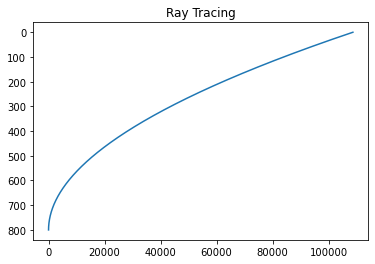

In [240]:
fig, ax = plt.subplots()
ax.plot(dx[:, 0], dz[0, :])
ax.set_title("Ray Tracing")
plt.gca().invert_yaxis()
plt.show()